In [1]:
import os
import os.path as osp
from glob import glob
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from pylab import rcParams
import json
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 8, 5

In [2]:
train = pd.read_json('../data/train.json')
val = pd.read_json('../data/val.json')
mapping = json.load(open('../data/class-mapper.json'))

train.head()

,name,lead,label,filename,path
0,101,MLII,N,276378,/home/jupyter/ecg-classification/data/2D/101/M...
1,100,MLII,N,642887,/home/jupyter/ecg-classification/data/2D/100/M...
2,214,MLII,L,185464,/home/jupyter/ecg-classification/data/2D/214/M...
3,203,MLII,N,222509,/home/jupyter/ecg-classification/data/2D/203/M...
4,213,MLII,N,557103,/home/jupyter/ecg-classification/data/2D/213/M...


In [3]:
train["label"].value_counts(normalize=True)

N    0.719184
L    0.077655
R    0.069800
V    0.068507
\    0.034815
A    0.024481
!    0.004542
E    0.001015
Name: label, dtype: float64

In [4]:
mapping

{'N': 0, 'L': 1, 'R': 2, 'V': 3, '\\': 4, 'A': 5, '!': 6, 'E': 7}

# Visualization

In [5]:
import wfdb
from PIL import Image

In [6]:
ecg_data = sorted([osp.splitext(i)[0] for i in glob('../mit-bih/*.atr')])

In [7]:
ecg = ecg_data[0]
ann = wfdb.rdann(ecg, extension='atr')
record = wfdb.rdrecord(ecg)

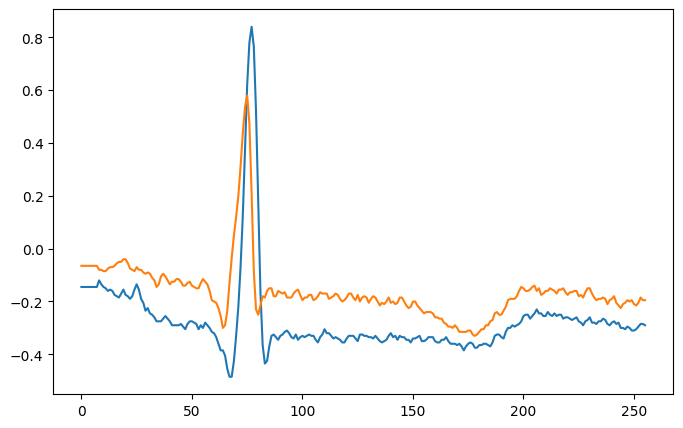

In [8]:
plt.plot(record.p_signal[0:256])

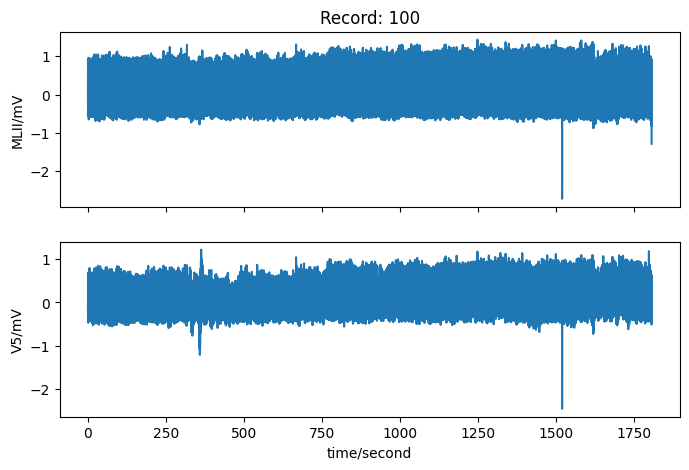

In [9]:
wfdb.plot_wfdb(record)

In [10]:
Normal = [np.array(Image.open(i)) for i in glob('../data/2D/100/MLII/N/*.png')[:9]]
A = [np.array(Image.open(i)) for i in glob('../data/2D/100/MLII/A/*.png')[:9]]

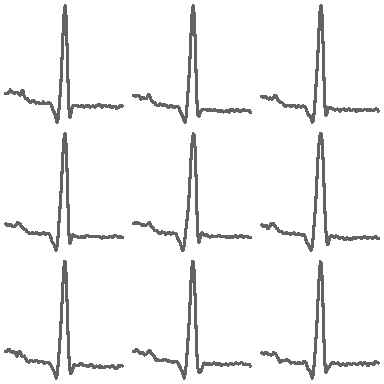

In [11]:
Image.fromarray(np.vstack( [np.hstack(Normal[i::3]) for i in range(0,3)] ))

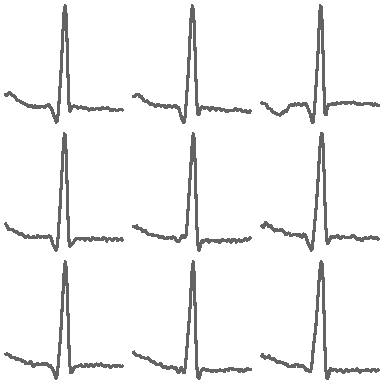

In [12]:
Image.fromarray(np.vstack( [np.hstack(A[i::3]) for i in range(0,3)] ))